![跟踪器](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+Forecasting&file=Vertex+AI+Pipelines+-+BQML+ARIMA%2B.ipynb)
<!--- 头部表格 --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20BQML%20ARIMA%2B.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>在<br>Colab中运行
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520Forecasting%2FVertex%2520AI%2520Pipelines%2520-%2520BQML%2520ARIMA%252B.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>在<br>Colab Enterprise中运行
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20BQML%20ARIMA%2B.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>在<br>GitHub上查看
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20BQML%20ARIMA%2B.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>在<br>Vertex AI Workbench中打开
    </a>
  </td>
</table>

# Vertex AI管道 - BQML ARIMA+

在[BQML ARIMA+单变量预测](./BQML%20Univariate%20Forecasting%20with%20ARIMA+.ipynb)笔记本中，使用BigQuery ML将预测模型拟合到citibike自行车租赁每日交易量数据中，该数据已在[BigQuery时间序列预测数据审查和准备](./BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb)中准备好。

该笔记本使用[Vertex AI管道](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)，该管道预先构建好以处理构建预测模型的代码和从中检索预测。该预构建管道还进行了更多数据验证步骤，甚至进行了预测回测和计算相关指标等步骤。

这仍然使用BigQuery，但通过由[Kubeflow Pipelines SDK](https://www.kubeflow.org/docs/components/pipelines/v2/introduction/)构建的管道编排步骤，并在Vertex AI管道的托管环境中运行。管道步骤在组件中运行，这些组件在相关容器中运行相关代码。尽管这些组件可以由用户自定义构建，但在这种情况下，管道完全是[预构建](https://cloud.google.com/vertex-ai/docs/pipelines/components-introduction)，因此只需要将输入传递给函数以驱动管道执行。

---

**系列概述**

[本系列](./readme.md)探索了使用Vertex AI、BigQuery ML和其他开源框架进行预测。预测是指随着时间的推移跟踪测量并探索趋势、季节性的影响（年、月、日等）、假期和特殊事件，希望利用这些见解预测未来。一些方法还将影响需求的可观测测量纳入考虑，以了解关系并使预测更加准确。

**数据来源：纽约市Citibike租赁**

本系列使用纽约市的Citibike租赁数据。将选择中央公园附近的自行车站，并跟踪这些站点日常出发的自行车行程次数。这将说明由于随着时间推移引进新站点，一些站点仅有最近几个月甚至几周的数据，因此会遇到一些常见的预测问题。数据可在BigQuery公共数据集中找到：
- `bigquery-public-data.new_york.citibike_trips`
- `bigquery-public-data.new_york.citibike_stations`

**BigQuery ML（BQML）概述**

[BigQuery ML](https://cloud.google.com/bigquery/docs/bqml-introduction)允许您使用`SQL`构建一个ML工作流程。当数据源为[BigQuery](https://cloud.google.com/bigquery/docs/introduction)且用户已经熟悉`SQL`时，这是生产力和灵活性的一个重大突破。仅使用`SQL`即可进行[model training](https://cloud.google.com/bigquery/docs/bqml-introduction#model_selection_guide)，甚至包括[hyperparameter tuning](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-hp-tuning-overview)等[多种技术](https://cloud.google.com/bigquery/docs/bqml-introduction#model_selection_guide)。它包括无服务器的[训练、评估和推断](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey)技术，适用于监督、无监督、时间序列方法，甚至推荐引擎。[预测](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-inference-overview)可以直接在BigQuery中提供，其中还包括可解释性措施。预测模型可以[导出为其本机框架](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-export-model)以实现可移植性，甚至可以直接[注册到Vertex AI模型注册表](https://cloud.google.com/bigquery/docs/managing-models-vertex)以在Vertex AI端点上进行在线预测。您可以从许多常见框架中[导入模型到BigQuery ML](https://cloud.google.com/bigquery/docs/reference/standard-sql/inference-overview#inference_using_imported_models)，或者[连接到远程托管模型](https://cloud.google.com/bigquery/docs/reference/standard-sql/inference-overview#inference_using_remote_models)在Vertex AI端点上。您甚至可以直接在Vertex AI中使用许多[预先训练的模型](https://cloud.google.com/bigquery/docs/reference/standard-sql/inference-overview#pretrained-models)如Cloud Vision API、Cloud Natural Language API和Cloud Translate API。

查看可用方法范围的绝佳起点是[模型的用户导航](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey)。本知识库还提供了一系列基于笔记本的用于许多BigQuery ML方法的工作流程，可在此查看：[../03 - BigQuery ML（BQML）](../03%20-%20BigQuery%20ML%20(BQML)/readme.md)。

---

**先决条件:**
- [BigQuery时间序列预测数据审查和准备](./BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb)
    - 为本笔记本准备数据

**资源**
- [BigQuery](https://cloud.google.com/bigquery/docs/introduction)
    - [BigQuery Python客户端](https://cloud.google.com/python/docs/reference/bigquery/latest)
    - [BigQuery ML](https://cloud.google.com/python/docs/reference/bigquery/latest)
    - [SQL参考](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax)
    - [BigQuery ML SQL参考](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-time-series)
- [Vertex AI](https://cloud.google.com/vertex-ai/docs/start/introduction-unified-platform)
    - [Vertex AI管道](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)
    - [Vertex AI Python SDK](https://cloud.google.com/python/docs/reference/aiplatform/latest)
    - [Vertex AI预测管道BQML ARIMA+](https://cloud.google.com/vertex-ai/docs/tabular-data/forecasting-arima/overview)
    - Google Cloud管道组件（预构建）：
        - [文档](https://cloud.google.com/vertex-ai/docs/pipelines/components-introduction)
        - [SDK参考](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.41/)

## Colab设置

要在Colab中运行此笔记本，请单击[![在Colab中打开](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20BQML%20ARIMA%2B.ipynb)，并运行本部分中的单元格。否则，请跳过此部分。

此单元格将对GCP进行身份验证（请按照弹出窗口中的提示操作）。

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

安装和API启用

客户端的包可能需要在这个环墼中安装。

安装（如有需要）

In [18]:
# tuples of (import name, install name)
packages = [
    ('google_cloud_pipeline_components', 'google-cloud-pipeline-components'),
    ('plotly', 'plotly'),
    ('kaleido', 'kaleido')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

installing package kaleido


### 重新启动内核（如果已安装） 

在内核重新启动后，代码提交可以从这一单元格之后的下一个单元格开始。

In [19]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

设置

输入:

In [1]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [2]:
REGION = 'us-central1'
EXPERIMENT = 'pipeline-bqml-arimaplus'
SERIES = 'applied-forecasting'

BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-','_')
BQ_TABLE = 'forecasting-data_prepped'

viz_limit = 12

包裹:

In [15]:
from google.cloud import bigquery
from google.cloud import aiplatform

#from google_cloud_pipeline_components.experimental.automl.forecasting import utils
from google_cloud_pipeline_components.v1.automl.forecasting import utils

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

客户:

In [16]:
bq = bigquery.Client(project = PROJECT_ID)
aiplatform.init(project=PROJECT_ID, location=REGION)

参数

In [17]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")

In [18]:
SERVICE_ACCOUNT = !gcloud config list --format='value(core.account)' 
SERVICE_ACCOUNT = SERVICE_ACCOUNT[0]
SERVICE_ACCOUNT

'1026793852137-compute@developer.gserviceaccount.com'

## 时间序列审查

**单变量预测**只包括每个时间序列的2列：
- `TARGET_COLUMN` =需求量测量值。
    在我们的情况下，这是从特定自行车站每天所乘坐的数量-一天的行程总和。
- `TIME_COLUMN` =需求的时间。
    表达为与预测练习的粒度相关的时间或日期单位。在我们的情况下，需求是每天进行衡量的，因此时间列准备为日期。

**附加列**用于指示预测算法处理数据的方式：
- `SERIES_COLUMN`将与同一时间序列相关的行分组。
    - 进行多个预测，每个预测对应一个时间序列，意味着包括第三列来捕捉每个时间序列的行的分组：`SERIES_COLUMN`。
    - **注意:** BigQuery ARIMA+为这些组的每个单独的预测拟合一次预测。在我们的情况下，这是`start_station_name`，这是中央公园附近每个单独的Citibike站的名称。
- `SPLITS_COLUMN`将每个时间序列内的顺序行分组，以在预测练习中使用。
    - 在预备笔记本中为`TRAIN`、`VALIDATE`和`TEST`设置了分割线。包含这些拆分的列可以在训练期间供所选的预测方法使用，而不是让该方法计算这些拆分。这在比较多种不同方法时可能很有帮助，因为它确保拆分在每种方法中的处理方式相同。

**预测参数**：
- `FORECAST_GRANULARITY`是测量频率，如分钟、小时、天、周、月、年
    - 数据在数据准备笔记本中以天为单位进行了总结。
    - 这是测量之间的时间量-行
    - 对于不同的粒度，您可能需要将需求信号总结为不同时间组件的`SUM`、`MIN`、`MAX`或`AVERAGE`。
    - 粒度规格因方法而异:
        - BigQuery ML: PER_MINUTE、HOURLY、DAILY、WEEKLY、MONTHLY、QUARTERLY、YEARLY
        - Prophet（包括Vertex预构建管道）: 分钟、小时、天、周、月或年
        - Vertex AI AutoML: 分钟、小时、天、周、月、年
    - BigQuery的一个非常有用的函数是提取时间和日期的组件的`EXTRACT`函数：
        - [作为日期函数的EXTRACT](https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions#extract)
        - [作为时间函数的EXTRACT](https://cloud.google.com/bigquery/docs/reference/standard-sql/time_functions#extract)
        - [作为日期时间函数的EXTRACT](https://cloud.google.com/bigquery/docs/reference/standard-sql/datetime_functions#extract)。
- `FORECAST_TEST_LENGTH`是分配给测试区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的。
    - 数据准备包括为每个时间序列中的`SERIES_COLUMMN`的`SPLITS_COLUMN='TEST'`值设置此值。
- `FORCAST_VALIDATE_LENGTH`是分配给验证区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的。
    - 数据准备包括为每个时间序列中的`SERIES_COLUMN`指定`SPLITS_COLUMN='VALIDATE'`值设置此值。
- `FORECAST_HORIZON_LENGTH`是预测未来超出测试区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的。
    - 这需要作为预测方法的一个输入来设置。

In [19]:
# CUSTOMIZE
TARGET_COLUMN = 'num_trips'
TIME_COLUMN = 'starttime'
SERIES_COLUMN = 'start_station_name'
SPLIT_COLUMN = 'splits'

# CUSTOMIZE
FORECAST_GRANULARITY = 'DAY' # the data preparation included preparing the data at this level
FORECAST_HORIZON_LENGTH = 14
FORECAST_TEST_LENGTH = 14 # the data preparation included setting this value for splits = TEST
FORECAST_VALIDATE_LENGTH = 14 # the data preparation included setting this value for splits = VALIDATE

从拆分中检索关键日期。这些拆分是在先决条件笔记本处理数据时定义的。这将从准备好的数据中检索信息。

In [20]:
query = f"""
    WITH
        SPLIT AS (
            SELECT {SPLIT_COLUMN}, min({TIME_COLUMN}) as mindate, max({TIME_COLUMN}) as maxdate
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            GROUP BY splits
        ),
        TRAIN AS (
            SELECT mindate as start_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} ='TRAIN'
        ),
        VAL AS (
            SELECT mindate as val_start
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'VALIDATE'
        ),
        TEST AS (
            SELECT mindate as test_start, maxdate as end_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'TEST'
        )
    SELECT * EXCEPT(pos) FROM
    (SELECT *, ROW_NUMBER() OVER() pos FROM TRAIN)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM VAL)
    USING (pos)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM TEST)
    USING (pos)
"""
keyDates = bq.query(query).to_dataframe()
keyDates

start_date   val_start  test_start    end_date
0  2013-07-01  2016-09-03  2016-09-17  2016-09-30

将`FORECAST_TEST_LENGTH`和`FORECAST_VALIDATE_LENGTH`的设定值更正为与准备好的数据匹配。

In [21]:
if FORECAST_TEST_LENGTH != (keyDates['end_date'][0] - keyDates['test_start'][0]).days + 1:
    FORECAST_TEST_LENGTH = (keyDates['end_date'][0] - keyDates['test_start'][0]).days + 1
    
if FORECAST_VALIDATE_LENGTH != (keyDates['test_start'][0] - keyDates['val_start'][0]).days:
    FORECAST_VALIDATE_LENGTH = (keyDates['test_start'][0] - keyDates['val_start'][0]).days
    
print('FORECAST_TEST_LENGTH is ', FORECAST_TEST_LENGTH)
print('FORECAST_VALIDATE_LENGTH is ', FORECAST_VALIDATE_LENGTH)

FORECAST_TEST_LENGTH is  14
FORECAST_VALIDATE_LENGTH is  14


检索原始数据:

In [22]:
query = f"""
    SELECT {SERIES_COLUMN}, {TIME_COLUMN}, {SPLIT_COLUMN}, {TARGET_COLUMN}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
    ORDER by {SERIES_COLUMN}, {TIME_COLUMN}
"""
rawSeries = bq.query(query).to_dataframe()

### 绘制时间序列

使用[Plotly](https://plotly.com/python/)创建一个交互式图表，用于查看单个时间序列（自行车站点），并通过滚动时间范围进行浏览。

In [23]:
# NA values in Pandas will not convert to JSON which Plotly uses:
rawSeries = rawSeries.fillna(np.nan).replace([np.nan], [None])

# create a figure:
fig = go.Figure()

# get a list of colors to use:
colors = px.colors.qualitative.Plotly

# list of columns to plot over time : target and covariates
variables = [TARGET_COLUMN] # + COVARIATE_COLUMNS # no covariate for univarate forecasting

# create dropdown/button to toggle series
buttons = []
b = 0 # default button index

# iterate through series:
series = rawSeries[SERIES_COLUMN].unique().tolist()[0:viz_limit]
for s in series:
    # iterate trhough columns
    for y, v in enumerate(variables):
        fig.add_trace(
            go.Scatter(
                x = rawSeries[rawSeries[SERIES_COLUMN]==s][TIME_COLUMN],
                y = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                name = f'{v}',
                text = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                yaxis = f"y{y+1}",
                hoverinfo='name+x+text',
                line = {'width': 0.5},
                marker = {'size': 8},
                mode = 'lines+markers',
                showlegend = False,
                visible = (b==0) # make a series visible as default: this uses the first series
            )
        )
    
    # which button to show:
    ff = 0 # count of forecast related traces add to each series
    which_buttons = [False] * len(series) * (len(variables) + ff)
    which_buttons[b * (len(variables) +ff):(b+1)*(len(variables) + ff)] = [True] * (len(variables) + ff)

    # create button for series:
    button = dict(
        label = s,
        method = 'update',
        args = [{'visible': which_buttons}]
    )
    buttons.append(button)
    b += 1

# add split regions: training
fig.add_shape(
    fillcolor = 'rgba(0, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['start_date'][0],
    x1 = keyDates['val_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] - (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Training',
    yanchor = 'bottom'
)

# add split regions: validation
fig.add_shape(
    fillcolor = 'rgba(255, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['val_start'][0],
    x1 = keyDates['test_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] + (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Validation',
    yanchor = 'bottom'
)

# add split regions: test
fig.add_shape(
    fillcolor = 'rgba(0, 0, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['test_start'][0],
    x1 = keyDates['end_date'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['test_start'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Test',
    yanchor = 'bottom'
)

# configure axes layout:
layout = dict(
    xaxis =  dict(
        range = [keyDates['end_date'][0] - 2*(keyDates['end_date'][0] - keyDates['val_start'][0]), keyDates['end_date'][0]],
        rangeslider = dict(
            autorange = True,
            range = [keyDates['start_date'][0], keyDates['end_date'][0]]
        ),
        type = 'date'
    )
)
for v, variable in enumerate(variables):
    layout[f'yaxis{v+1}'] = dict(
        anchor = 'x',
        domain = [v*(1/len(variables)), (v+1)*(1/len(variables))],
        autorange = True,
        mirror = True,
        autoshift = True,
        title = dict(text = variable, standoff = 10 + 20 * (v % 2), font = dict(color = colors[v])),
        tickfont = dict(color = colors[v]),
        tickmode = 'auto',
        linecolor = colors[v],
        linewidth = 4,
        showline = True,
        side = 'right',
        type = 'linear',
        zeroline = False
    )

# final update of display before rendering
fig.update_layout(
    layout,
    title = 'Time Series Plots:',
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
    updatemenus = [
        dict(
            buttons = buttons,
            type = 'dropdown',
            direction = 'down',
            x = 1,
            y = 1.2,
            showactive = True
        )
    ]
)

# render the interactive plot:
fig.show()

A Snapshot of the interactive plot:


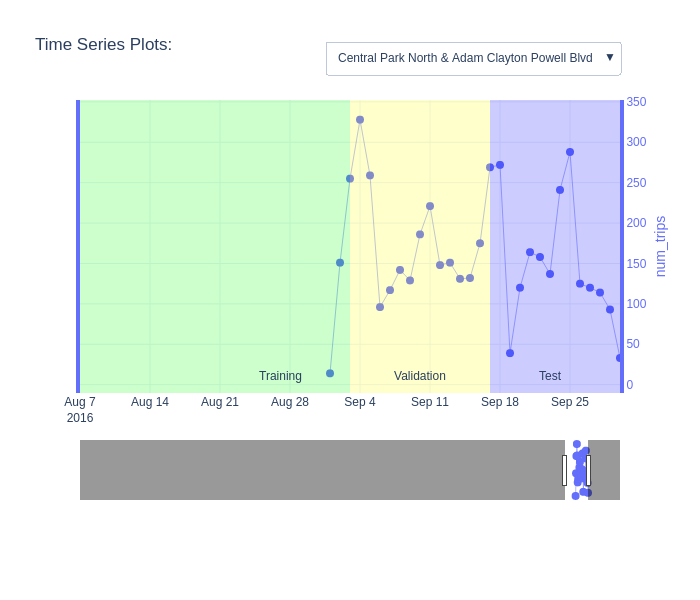

In [24]:
print('A Snapshot of the interactive plot:')
fig.show('png')

创建预测模型
使用BigQuery ML Arima+ (`model_type = 'ARIMA_PLUS'`)，这是[BigQuery ML](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey)的一个特性。这个模型使用ARIMA进行单变量时间序列建模，同时也自动化了许多这类推断任务的过程：预处理、假日调整、尖峰、低谷、异常值、季节性和趋势分解、变更调整、趋势建模、预测。这个流程的示意图来自BigQuery ML文档： 

<p><center>
    <img alt="ARIMA_PLUS Flowchart" src="https://cloud.google.com/static/bigquery/images/BQ_ARIMA_diagram.png" width="75%">
</center><p>

### 训练管道

创建训练管道规范

与在[BQML ARIMA+单变量预测](./BQML%20Univariate%20Forecasting%20with%20ARIMA+.ipynb)笔记本中直接与BigQuery交互不同，此示例使用在Vertex AI管道上运行的预构建管道。这意味着只需提供参数，让它代表我们进行编码工作。它实际上做了更多的事情。它还在指定的窗口进行预测算法的回测。

链接到SDK以获取[utils.get_bqml_arima_train_pipeline_and_parameters](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.41/google_cloud_pipeline_components.experimental.automl.forecasting.html#google_cloud_pipeline_components.experimental.automl.forecasting.utils.get_bqml_arima_train_pipeline_and_parameters)。

In [25]:
train_job_spec_path, train_parameter_values = utils.get_bqml_arima_train_pipeline_and_parameters(
    root_dir = f'gs://{PROJECT_ID}/{SERIES}/{EXPERIMENT}',
    project = PROJECT_ID,
    location = REGION,
    time_column = TIME_COLUMN,
    time_series_identifier_column = SERIES_COLUMN,
    target_column = TARGET_COLUMN,
    forecast_horizon = FORECAST_HORIZON_LENGTH,
    data_granularity_unit = FORECAST_GRANULARITY,
    predefined_split_key = SPLIT_COLUMN,
    data_source_bigquery_table_path = f'bq://{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}',
    window_stride_length = 1,
    bigquery_destination_uri = f"{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}",
    override_destination = True,
    max_order = 5,
)

运行训练管道

链接到SDK，以使用 [aiplatform.PipelineJob()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob)。

In [26]:
training_pipeline_job = aiplatform.PipelineJob(
    job_id = f'{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    display_name = f'{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    pipeline_root = f'gs://{PROJECT_ID}/{SERIES}/{EXPERIMENT}/pipeline_root',
    template_path = train_job_spec_path,
    parameter_values = train_parameter_values
)

链接到SDK：
- [aiplatform.PipelineJob.submit()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_submit)
    - 运行并且不等待
- [aiplatform.PipelineJob.run()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_run)
    - 运行并等待，在日志中报告进度

In [27]:
training_pipeline_job.submit(
    service_account=SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515?project=1026793852137


In [28]:
print(f'The Dashboard can be viewed here:\n{training_pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515?project=1026793852137


请先选择一种语言。
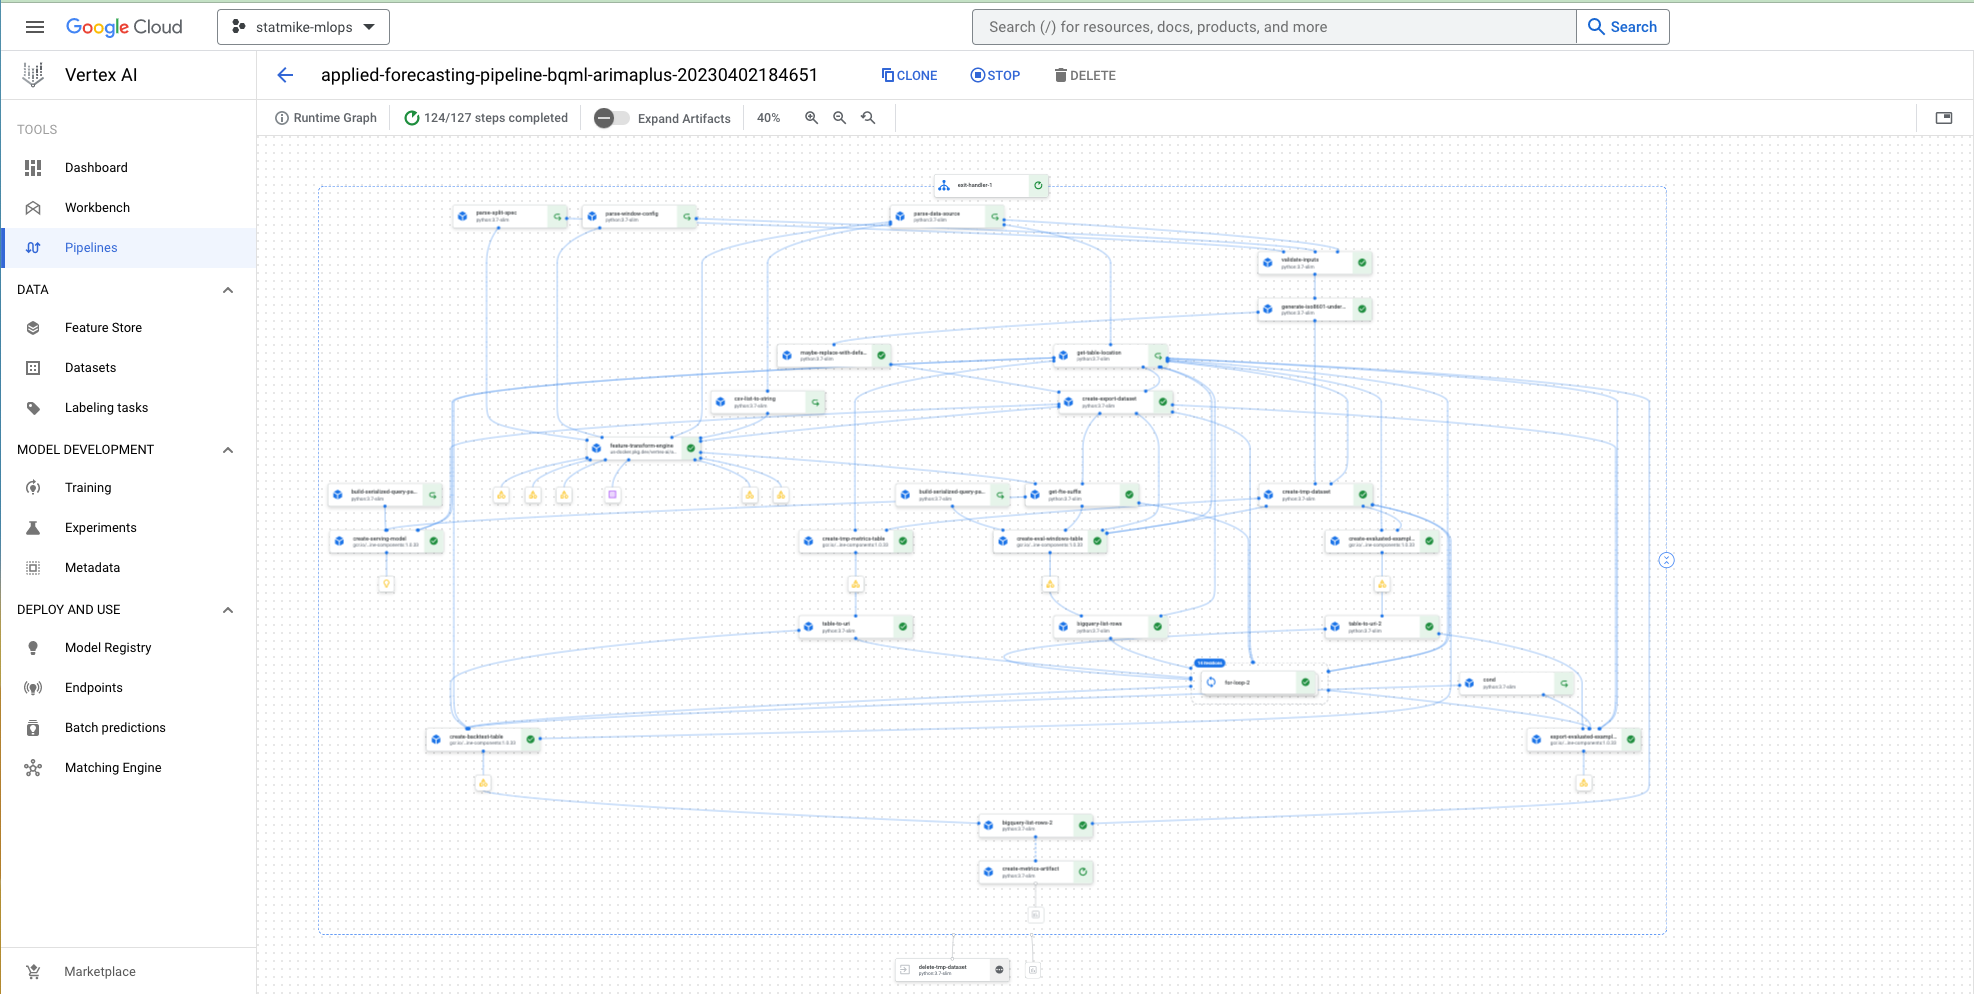
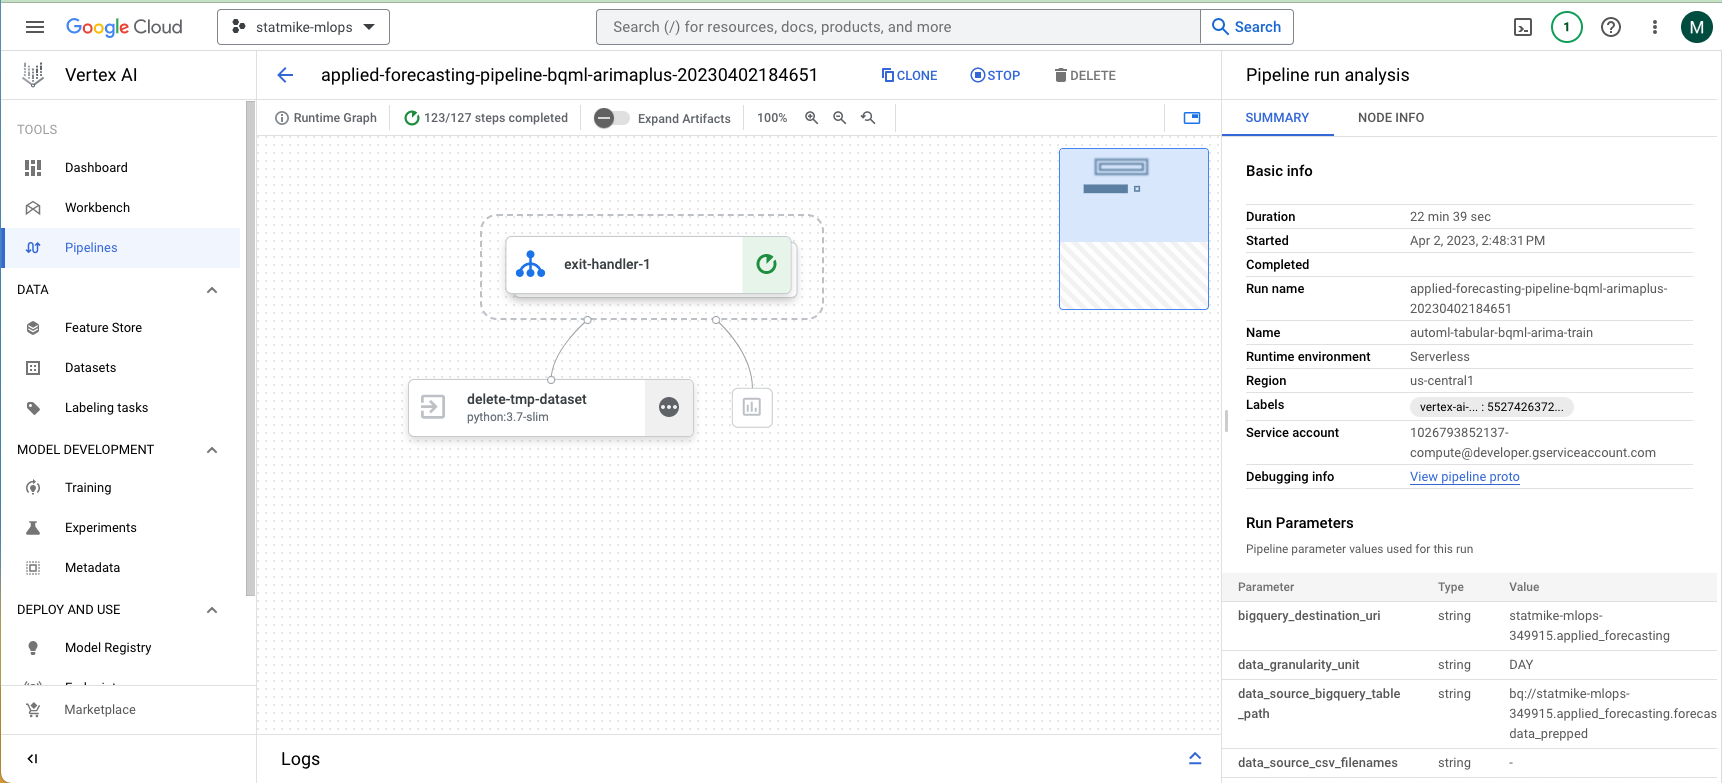

#### 等待训练管道作业

In [29]:
training_pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-bqml-arimaplus-20231210193515 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipel

#### 审查培训管道工作

In [30]:
aiplatform.get_pipeline_df(pipeline = f'automl-tabular-bqml-arima-train').head(1)

pipeline_name  \
0  automl-tabular-bqml-arima-train   

                                            run_name  \
0  applied-forecasting-pipeline-bqml-arimaplus-20...   

  param.input:encryption_spec_key_name  \
0                                        

  param.input:time_series_identifier_column param.input:location  \
0                        start_station_name          us-central1   

  param.input:run_evaluation param.input:override_destination  \
0                       True                             True   

  param.input:timestamp_split_key  param.input:validation_fraction  \
0                                                             -1.0   

  param.vertex-ai-pipelines-artifact-argument-binding  ...  \
0  {'output:create-metrics-artifact-evaluation_me...   ...   

  param.input:predefined_split_key  param.input:window_max_count  \
0                           splits                          -1.0   

     param.input:project param.input:forecast_horizon  \
0  statmike-mlops-349915                         14.0   

  param.input:data_granularity_unit param.input:target_column  \
0                               DAY                 num_trips   

  param.input:window_stride_length metric.meanAbsoluteError  \
0                              1.0        38.36491072739296   

  metric.rootMeanSquaredError metric.meanAbsolutePercentageError  
0           55.35502574650128                  70.43733520326575  

[1 rows x 29 columns]

获取BQML模型
就像直接使用BigQuery一样，这个流水线还在BigQuery中创建了一个模型，可以检索和查看-甚至在控制台中。

In [31]:
for task in training_pipeline_job.gca_resource.job_detail.task_details:
    if task.task_name == "bigquery-create-model-job":
        model_name = task.outputs["model"].artifacts[0].metadata["modelId"]
        break
else:
    raise ValueError("Not Found.")
    
print(model_name)

model_2264835898422067200


使用BigQuery客户端直接检索模型的特征信息:

In [32]:
query = f"""
    SELECT *
    FROM ML.FEATURE_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}.{model_name}`)
"""
featureInfo = bq.query(query).to_dataframe()
featureInfo.head()

input  min    max        mean  median     stddev  \
0           num_trips  1.0  607.0  119.971702   103.0  88.469936   
1           starttime  NaN    NaN         NaN     NaN        NaN   
2  start_station_name  NaN    NaN         NaN     NaN        NaN   

   category_count  null_count  dimension  
0            <NA>           0       <NA>  
1            1184           0       <NA>  
2              12           0       <NA>

### 预测流程管线

创建预测管道规格。

链接至 SDK，用于[utils.get_bqml_arima_predict_pipeline_and_parameters](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.41/google_cloud_pipeline_components.experimental.automl.forecasting.html#google_cloud_pipeline_components.experimental.automl.forecasting.utils.get_bqml_arima_predict_pipeline_and_parameters)

In [46]:
predict_job_spec_path, predict_parameter_values = utils.get_bqml_arima_predict_pipeline_and_parameters(
    project = PROJECT_ID,
    location = REGION,
    model_name = f"{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}.{model_name}",
    data_source_bigquery_table_path = f'{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}',
    bigquery_destination_uri = f"{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}"
)

运行预测工作流

链接到 [aiplatform.PipelineJob()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob) 的SDK。

In [47]:
prediction_pipeline_job = aiplatform.PipelineJob(
    #job_id = f'prediction-{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    display_name = f'prediction-{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    pipeline_root = f'gs://{PROJECT_ID}/{SERIES}/{EXPERIMENT}/pipeline_root/prediction',
    template_path = predict_job_spec_path,
    parameter_values = predict_parameter_values
)

链接到SDK：
- [aiplatform.PipelineJob.submit()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_submit)
    - 运行并且不等待
- [aiplatform.PipelineJob.run()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_run)
    - 运行并等待，在日志中报告进度

In [48]:
prediction_pipeline_job.submit(
    service_account=SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/automl-tabular-bqml-arima-prediction-20231211005738?project=1026793852137


In [49]:
print(f'The Dashboard can be viewed here:\n{prediction_pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/automl-tabular-bqml-arima-prediction-20231211005738?project=1026793852137


将以下英文文本翻译成中文：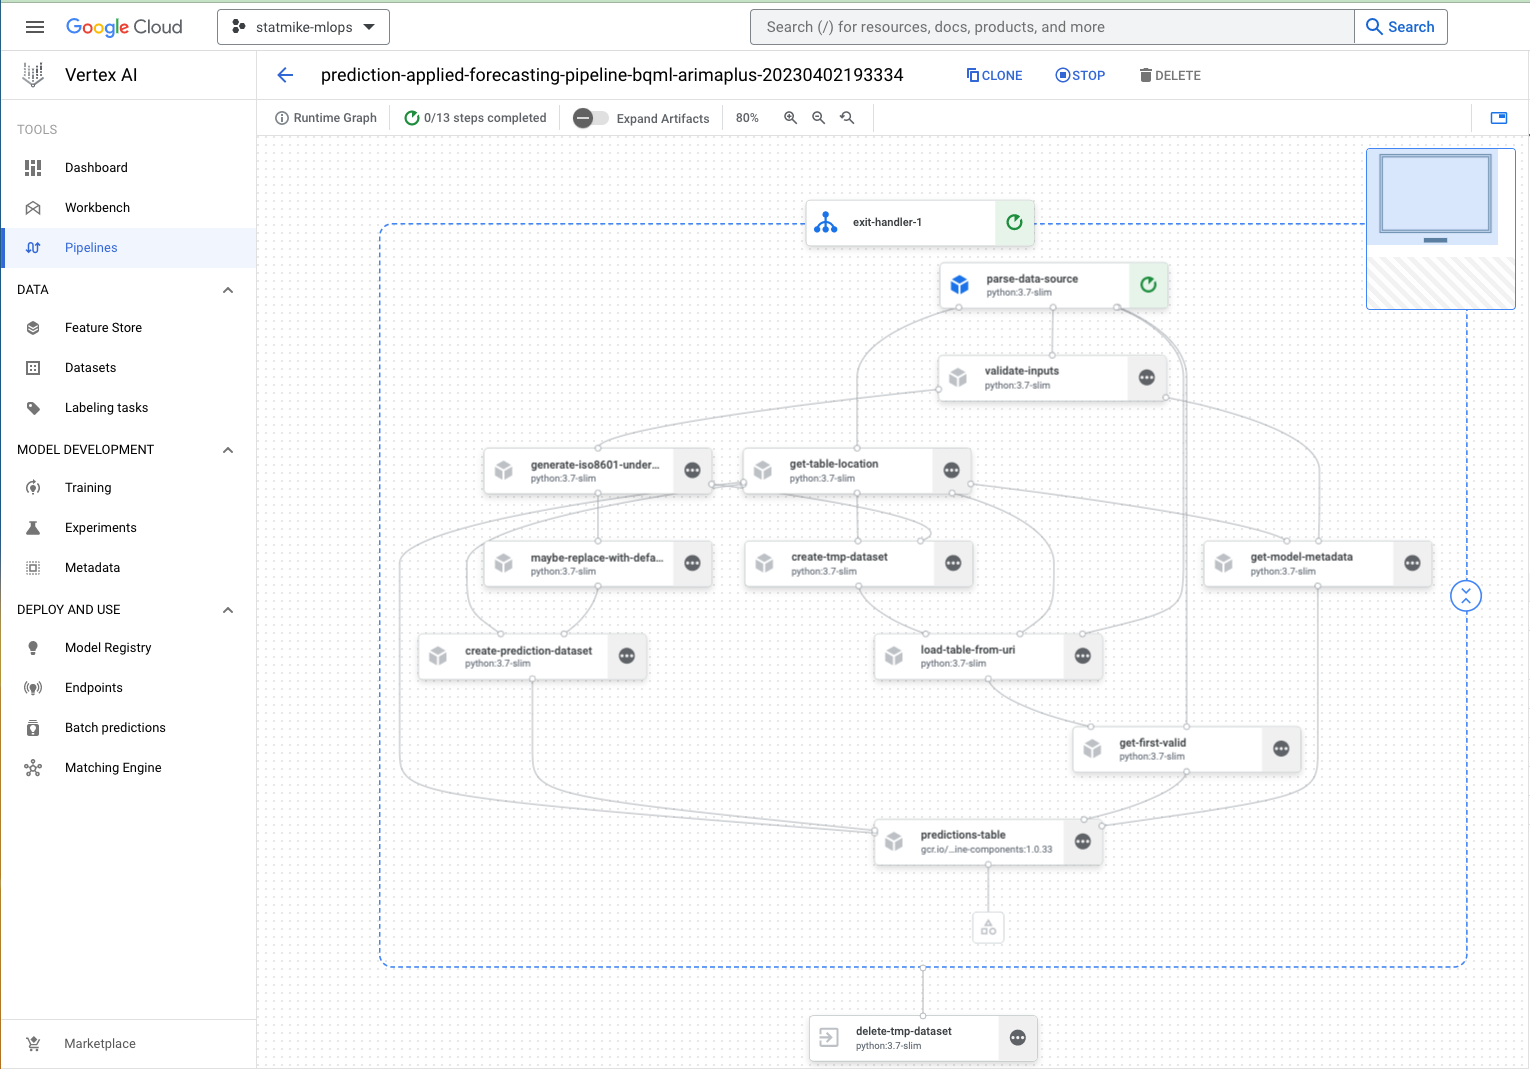

等待预测管道作业

In [50]:
prediction_pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/automl-tabular-bqml-arima-prediction-20231211005738 current 

#### 回顾预测管道作业

In [51]:
aiplatform.get_pipeline_df(pipeline = f'automl-tabular-bqml-arima-prediction').head(1)

pipeline_name  \
0  automl-tabular-bqml-arima-prediction   

                                            run_name  \
0  automl-tabular-bqml-arima-prediction-202312110...   

  param.input:data_source_csv_filenames  \
0                                         

         param.input:data_source_bigquery_table_path  \
0  statmike-mlops-349915.applied_forecasting.fore...   

                param.input:bigquery_destination_uri    param.input:project  \
0  statmike-mlops-349915.applied_forecasting_pipe...  statmike-mlops-349915   

  param.input:generate_explanation  \
0                            False   

                              param.input:model_name param.input:location  \
0  statmike-mlops-349915.applied_forecasting_pipe...          us-central1   

  param.input:encryption_spec_key_name  
0

获得表名

In [52]:
for task in prediction_pipeline_job.gca_resource.job_detail.task_details:
    if task.task_name == "bigquery-query-job":
        pred_table = (
            task.outputs["destination_table"].artifacts[0].metadata["tableId"]
        )
        break
else:
    raise ValueError("Not Found.")
    
pred_table

'predictions_7283253258196353024'

获取预测

In [53]:
query = f"""
    SELECT *, 
        EXTRACT(DATE FROM time_series_timestamp) AS {TIME_COLUMN}
    FROM ML.EXPLAIN_FORECAST(
        MODEL `{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}.{model_name}`,
        STRUCT({FORECAST_HORIZON_LENGTH} AS horizon, 0.95 AS confidence_level))
    ORDER BY {SERIES_COLUMN}, {TIME_COLUMN}
"""
explain = bq.query(query).to_dataframe()

In [54]:
explain.head()

start_station_name     time_series_timestamp  \
0  Central Park North & Adam Clayton Powell Blvd 2016-09-01 00:00:00+00:00   
1  Central Park North & Adam Clayton Powell Blvd 2016-09-02 00:00:00+00:00   
2  Central Park North & Adam Clayton Powell Blvd 2016-09-03 00:00:00+00:00   
3  Central Park North & Adam Clayton Powell Blvd 2016-09-04 00:00:00+00:00   
4  Central Park North & Adam Clayton Powell Blvd 2016-09-05 00:00:00+00:00   

  time_series_type  time_series_data  time_series_adjusted_data  \
0          history              14.0                  14.000000   
1          history             151.0                 100.515293   
2          history             255.0                 256.553957   
3          history             328.0                 268.022555   
4          history             259.0                 185.982751   

   standard_error  confidence_level  prediction_interval_lower_bound  \
0       37.832991               NaN                              NaN   
1       37.832991               NaN                              NaN   
2       37.832991               NaN                              NaN   
3       37.832991               NaN                              NaN   
4       37.832991               NaN                              NaN   

   prediction_interval_upper_bound       trend  ...  \
0                              NaN  159.745870  ...   
1                              NaN  122.779187  ...   
2                              NaN  189.116074  ...   
3                              NaN  158.772379  ...   
4                              NaN  198.401623  ...   

   holiday_effect_US_LaborDay  holiday_effect_US_MemorialDay  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

   holiday_effect_US_MLKDay  holiday_effect_US_PresidentDay  \
0                       NaN                             NaN   
1                       NaN                             NaN   
2                       NaN                             NaN   
3                       NaN                             NaN   
4                       NaN                             NaN   

   holiday_effect_US_Superbowl  holiday_effect_US_Thanksgiving  \
0                          NaN                             NaN   
1                          NaN                             NaN   
2                          NaN                             NaN   
3                          NaN                             NaN   
4                          NaN                             NaN   

   holiday_effect_Valentine  holiday_effect_VeteranDay  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   holiday_effect_WhitMonday   starttime  
0                        NaN  2016-09-01  
1                        NaN  2016-09-02  
2                        NaN  2016-09-03  
3                        NaN  2016-09-04  
4                        NaN  2016-09-05  

[5 rows x 54 columns]

用预测可视化时间序列

In [55]:
# NA values in Pandas will not convert to JSON which Plotly uses:
rawSeries = rawSeries.fillna(np.nan).replace([np.nan], [None])

# create a figure:
fig = go.Figure()

# get a list of colors to use:
colors = px.colors.qualitative.Plotly

# list of columns to plot over time : target and covariates
variables = [TARGET_COLUMN] # + COVARIATE_COLUMNS # no covariate for univarate forecasting

# create dropdown/button to toggle series
buttons = []
b = 0 # default button index

# iterate through series:
series = rawSeries[SERIES_COLUMN].unique().tolist()[0:viz_limit]
for s in series:    
    # iterate trhough columns
    for y, v in enumerate(variables):
        fig.add_trace(
            go.Scatter(
                x = rawSeries[rawSeries[SERIES_COLUMN]==s][TIME_COLUMN],
                y = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                name = f'{v}',
                text = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                yaxis = f"y{y+1}",
                hoverinfo='name+x+text',
                line = {'width': 0.5},
                marker = {'size': 8},
                mode = 'lines+markers',
                showlegend = False,
                visible = (b==0) # make a series visible as default: this uses the first series
            )
        )
        if y == 0: # add the forecast
            # add the forecast prediction funnel to test and horizon: lower
            fig.add_trace(
                go.Scatter(
                    x = explain[explain[SERIES_COLUMN]==s][TIME_COLUMN],
                    y = explain[explain[SERIES_COLUMN]==s]['prediction_interval_lower_bound'],
                    name = f'Lower Prediction: {v}',
                    text = explain[explain[SERIES_COLUMN]==s]['prediction_interval_lower_bound'],
                    yaxis = f"y{y+1}",
                    hoverinfo='name+x+text',
                    line = {'width': 2, 'color': 'rgb(0,128,0)'},
                    mode = 'lines',
                    showlegend = False,
                    visible = (b==0) # make a series visible as default: this uses the first series
                )
            )
            # add the forecast prediction funnel to test and horizon: upper
            fig.add_trace(
                go.Scatter(
                    x = explain[explain[SERIES_COLUMN]==s][TIME_COLUMN],
                    y = explain[explain[SERIES_COLUMN]==s]['prediction_interval_upper_bound'],
                    name = f'Upper Prediction: {v}',
                    text = explain[explain[SERIES_COLUMN]==s]['prediction_interval_upper_bound'],
                    yaxis = f"y{y+1}",
                    hoverinfo='name+x+text',
                    line = {'width': 2, 'color': 'rgb(0,128,0)'},
                    mode = 'lines',
                    fillcolor = 'rgba(0,128,0,0.5)',
                    fill = 'tonexty',
                    showlegend = False,
                    visible = (b==0) # make a series visible as default: this uses the first series
                )
            )
            # add the forecast fit
            fig.add_trace(
                go.Scatter(
                    x = explain[explain[SERIES_COLUMN]==s][TIME_COLUMN],
                    y = explain[explain[SERIES_COLUMN]==s]['time_series_adjusted_data'],
                    name = f'Forecast: {v}',
                    text = explain[explain[SERIES_COLUMN]==s]['time_series_adjusted_data'],
                    yaxis = f"y{y+1}",
                    hoverinfo='name+x+text',
                    line = {'width': 2, 'color': 'rgb(255,234,0)'},
                    mode = 'lines',
                    showlegend = False,
                    visible = (b==0) # make a series visible as default: this uses the first series
                )
            )
    
    # which button to show:
    ff = 3 # count of forecast related traces add to each series
    which_buttons = [False] * len(series) * (len(variables) + ff)
    which_buttons[b * (len(variables) +ff):(b+1)*(len(variables) + ff)] = [True] * (len(variables) + ff)

    # create button for series:
    button = dict(
        label = s,
        method = 'update',
        args = [{'visible': which_buttons}]
    )
    buttons.append(button)
    b += 1

# add split regions: training
fig.add_shape(
    fillcolor = 'rgba(0, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['start_date'][0],
    x1 = keyDates['val_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] - (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Training',
    yanchor = 'bottom'
)

# add split regions: validation
fig.add_shape(
    fillcolor = 'rgba(255, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['val_start'][0],
    x1 = keyDates['test_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] + (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Validation',
    yanchor = 'bottom'
)

# add split regions: test
fig.add_shape(
    fillcolor = 'rgba(0, 0, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['test_start'][0],
    x1 = keyDates['end_date'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['test_start'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Test',
    yanchor = 'bottom'
)

# add split regions: horizon
fig.add_shape(
    fillcolor = 'rgba(255, 255, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['end_date'][0],
    x1 = keyDates['end_date'][0]+timedelta(days = FORECAST_HORIZON_LENGTH),
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['end_date'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Horizon',
    yanchor = 'bottom'
)

# configure axes layout:
layout = dict(
    xaxis =  dict(
        range = [keyDates['end_date'][0] - 2*(keyDates['end_date'][0] - keyDates['val_start'][0]), keyDates['end_date'][0]+timedelta(days = FORECAST_HORIZON_LENGTH)],
        rangeslider = dict(
            autorange = True,
            range = [keyDates['start_date'][0], keyDates['end_date'][0]+timedelta(days = FORECAST_HORIZON_LENGTH)]
        ),
        type = 'date'
    )
)
for v, variable in enumerate(variables):
    layout[f'yaxis{v+1}'] = dict(
        anchor = 'x',
        domain = [v*(1/len(variables)), (v+1)*(1/len(variables))],
        autorange = True,
        mirror = True,
        autoshift = True,
        title = dict(text = variable, standoff = 10 + 20 * (v % 2), font = dict(color = colors[v])),
        tickfont = dict(color = colors[v]),
        tickmode = 'auto',
        linecolor = colors[v],
        linewidth = 4,
        showline = True,
        side = 'right',
        type = 'linear',
        zeroline = False
    )

# final update of display before rendering
fig.update_layout(
    layout,
    title = 'Time Series Plots:',
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
    updatemenus = [
        dict(
            buttons = buttons,
            type = 'dropdown',
            direction = 'down',
            x = 1,
            y = 1.2,
            showactive = True
        )
    ]
)

# render the interactive plot:
fig.show()

A Snapshot of the interactive plot:


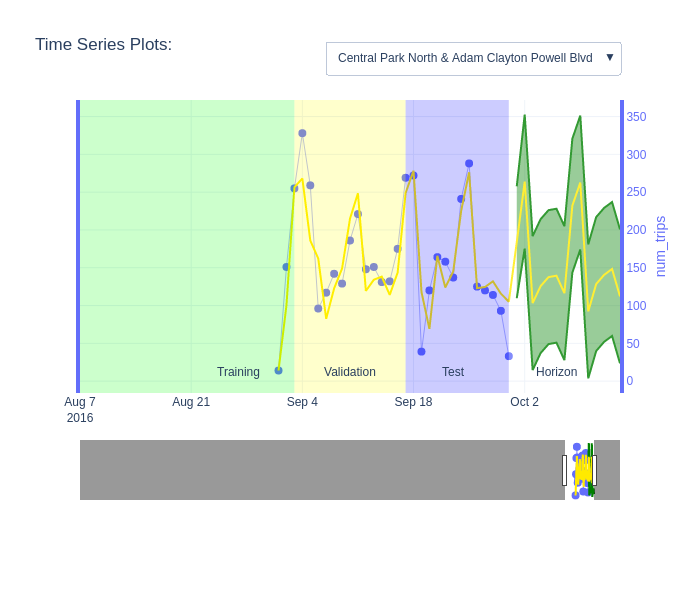

In [56]:
print('A Snapshot of the interactive plot:')
fig.show('png')

使用SQL计算指标

评估预测效果的一些常见指标包括：
- MAPE，即平均绝对百分比误差
    - $\textrm{MAPE} = \frac{1}{n}\sum{\frac{\mid(actual - forecast)\mid}{actual}}$
- MAE，即平均绝对误差
     - $\textrm{MAE} = \frac{1}{n}\sum{\mid(actual - forecast)\mid}$
- 将MAE除以平均需求，使其变成像MAPE那样的百分比
    - $\textrm{pMAE} = \frac{\sum{\mid(actual - forecast)\mid}}{\sum{actual}}$
- MSE，即均方误差
    - $\textrm{MSE} = \frac{1}{n}\sum{(actual-forecast)^2}$
- RMSE，即均方根误差
    - $\textrm{RMSE} = \sqrt{\frac{1}{n}\sum{(actual-forecast)^2}}$
- 将RMSE除以平均需求，使其变成像MAPE那样的百分比
    - $\textrm{pRMSE} = \frac{\sqrt{\frac{1}{n}\sum{(actual-forecast)^2}}}{\frac{1}{n}\sum{actual}}$

明确计算这些指标可以帮助在数据集和模型之间进行公平比较。本节展示了使用SQL计算这些指标的示例。

>```sql
>(actual_value - forecast_value) as diff
>
>
>AVG(SAFE_DIVIDE(ABS(diff), actual_value)) as MAPE,
>AVG(ABS(diff)) as MAE,
>SAFE_DIVIDE(SUM(ABS(diff)), SUM(actual_value)) as pMAE,
>AVG(POW(diff, 2)) as MSE,
>SQRT(AVG(POW(diff, 2))) as RMSE,
>SAFE_DIVIDE(SQRT(AVG(POW(diff, 2))), AVG(actual_value)) as pRMSE
>```

In [57]:
query = f"""
    WITH
        FORECAST AS (
            SELECT
                {SERIES_COLUMN}, 
                EXTRACT(DATE from time_series_timestamp) as {TIME_COLUMN},
                time_series_adjusted_data as forecast_value,
                time_series_type
            FROM ML.EXPLAIN_FORECAST(
                MODEL `{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}.{model_name}`,
                STRUCT({FORECAST_TEST_LENGTH} AS horizon, 0.95 AS confidence_level))
            #WHERE time_series_type = 'forecast'
        ),
        ACTUAL AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, sum({TARGET_COLUMN}) as actual_value
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE splits = 'TEST'
            GROUP BY {SERIES_COLUMN}, {TIME_COLUMN}
        ),
        COMBINED AS (
            SELECT *
            FROM ACTUAL
            INNER JOIN FORECAST
            USING ({SERIES_COLUMN}, {TIME_COLUMN})  
        ),
        DIFFS AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, 'forecast' as time_series_type, 
                actual_value, forecast_value, (actual_value - forecast_value) as diff
            FROM COMBINED
        )
    SELECT {SERIES_COLUMN}, time_series_type, 
            AVG(SAFE_DIVIDE(ABS(diff), actual_value)) as MAPE,
            AVG(ABS(diff)) as MAE,
            SAFE_DIVIDE(SUM(ABS(diff)), SUM(actual_value)) as pMAE,
            AVG(POW(diff, 2)) as MSE,
            SQRT(AVG(POW(diff, 2))) as RMSE,
            SAFE_DIVIDE(SQRT(AVG(POW(diff, 2))), AVG(actual_value)) as pRMSE
    FROM DIFFS
    GROUP BY {SERIES_COLUMN}, time_series_type
    ORDER BY {SERIES_COLUMN}, time_series_type    
"""
customMetrics = bq.query(query = query).to_dataframe()
customMetrics.head(viz_limit)

start_station_name time_series_type      MAPE  \
0   Central Park North & Adam Clayton Powell Blvd         forecast  0.398611   
1                          Central Park S & 6 Ave         forecast  0.301060   
2                        Central Park W & W 96 St         forecast  0.387539   
3                    Central Park West & W 100 St         forecast  0.656181   
4                    Central Park West & W 102 St         forecast  0.543194   
5                     Central Park West & W 68 St         forecast  0.342527   
6                     Central Park West & W 72 St         forecast  0.378440   
7                     Central Park West & W 76 St         forecast  0.297333   
8                     Central Park West & W 85 St         forecast  0.736679   
9               Grand Army Plaza & Central Park S         forecast  0.255568   
10                   W 106 St & Central Park West         forecast  0.187669   
11                    W 82 St & Central Park West         forecast  0.255140   

          MAE      pMAE          MSE       RMSE     pRMSE  
0   24.805290  0.159813  1211.688602  34.809318  0.224266  
1   52.262613  0.160139  6704.350849  81.880100  0.250891  
2   18.524787  0.185116   577.995621  24.041539  0.240244  
3   10.918241  0.275415   196.055809  14.001993  0.353203  
4   14.363757  0.283628   319.376482  17.871107  0.352885  
5   32.782255  0.216385  1640.965688  40.508835  0.267385  
6   29.262914  0.165399  1819.264448  42.652836  0.241081  
7   22.187433  0.202625   723.274400  26.893761  0.245605  
8   44.194991  0.351551  2485.421359  49.854000  0.396566  
9   40.632235  0.186848  2324.520182  48.213278  0.221709  
10  10.470491  0.156777   180.719505  13.443195  0.201288  
11  19.848721  0.215079   652.840769  25.550749  0.276866

整体指标:

In [58]:
query = f"""
    WITH
        FORECAST AS (
            SELECT
                {SERIES_COLUMN}, 
                EXTRACT(DATE from time_series_timestamp) as {TIME_COLUMN},
                time_series_adjusted_data as forecast_value,
                time_series_type
            FROM ML.EXPLAIN_FORECAST(
                MODEL `{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}.{model_name}`, 
                STRUCT({FORECAST_TEST_LENGTH} AS horizon, 0.95 AS confidence_level))
            #WHERE time_series_type = 'forecast'
        ),
        ACTUAL AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, sum({TARGET_COLUMN}) as actual_value
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE splits = 'TEST'
            GROUP BY {SERIES_COLUMN}, {TIME_COLUMN}
        ),
        COMBINED AS (
            SELECT *
            FROM ACTUAL
            INNER JOIN FORECAST
            USING ({SERIES_COLUMN}, {TIME_COLUMN})  
        ),
        DIFFS AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, 'forecast' as time_series_type, 
                actual_value, forecast_value, (actual_value - forecast_value) as diff
            FROM COMBINED
        )
    SELECT time_series_type, 
        AVG(SAFE_DIVIDE(ABS(diff), actual_value)) as MAPE,
        AVG(ABS(diff)) as MAE,
        SAFE_DIVIDE(SUM(ABS(diff)), SUM(actual_value)) as pMAE,
        AVG(POW(diff, 2)) as MSE,
        SQRT(AVG(POW(diff, 2))) as RMSE,
        SAFE_DIVIDE(SQRT(AVG(POW(diff, 2))), AVG(actual_value)) as pRMSE
    FROM DIFFS
    GROUP BY time_series_type
    ORDER BY time_series_type    
"""
customMetricsOverall = bq.query(query).to_dataframe()
customMetricsOverall

time_series_type      MAPE        MAE      pMAE          MSE       RMSE  \
0         forecast  0.380933  25.813158  0.192735  1523.074829  39.026591   

      pRMSE  
0  0.291394